## 回帰分析

In [1]:
### Packages ###
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import load_boston
import seaborn as sns
sns.set()
from scipy.stats import pearsonr

### 例題: boston
- 米国ボストン市郊外における地域別の住宅価格のデータセット

従属変数: 1000ドル台でオーナーが所有する住宅の価格の中央値

|  説明変数のラベル  |  データの説明  |
| ---- | ---- |
|CRIM|	人口1人あたりの犯罪発生率|
|ZN|	25000平方フィート以上の住居区画の占める割合|
|INDUS|	小売業以外の商業が占める面積の割合|
|CHAS|	チャールズ川によるダミー変数（1:川の周辺、0:それ以外）|
|NOX|	NOXの濃度|
|RM|	住居の平均部屋数|
|AGE|	1940年より前に建てられた物件の割合|
|DIS|	5つのボストン市の雇用施設からの距離（重み付け済）|
|RAD|	環状高速道路へのアクセスしやすさ|
|TAX|	10000ドルあたりの不動産税率の総計|
|PTRATIO|	町毎の児童と教師の比率|
|B|	町毎の黒人（Bk）の比率|
|LSTAT|	給与の低い職業に従事する人口の割合（%）|

In [2]:
########## functions ##########
### ペアプロット ###
def execute_plot(data):
    fig = plt.figure()
    sns.pairplot(data)
    plt.savefig("./pairplot.png")

### ヒートマップ ###
def execute_draw_heatmap(data):
    # 相関係数
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=True, cbar=True, cmap='coolwarm', square=True, fmt='.2f', ax=ax)
    return corr

# 相関係数の有意性の検定
def get_significant_corr(data, data_label):
    vslst = []; corrlst = []; pvallst = []
    for i in range(len(data_label)):
        for j in range(i, len(data_label)):
            x = data.iloc[:, i].values
            y = data.iloc[:, j].values
            corr, pval = pearsonr(np.ravel(x), np.ravel(y))     # corr and p val
            if 0 != pval.round(10) < 0.05:  # if pval < 0.05
                vslst.append([data_label[i], data_label[j]])
                corrlst.append([corr, pval])
    return vslst, corrlst

### 重回帰分析 ###
def execute_multiple_regression(exp_variable, obj_variable):
    # 全要素が1の列を説明変数の先頭に追加 (切片を付けるため)
    X = sm.add_constant(exp_variable)
    # モデルの設定
    model = sm.OLS(obj_variable, X)
    # 回帰分析の実行
    results = model.fit()
    # 結果の出力
    return results

In [3]:
## データを整理
boston = load_boston()                                          # load boston
df = pd.DataFrame(boston.data, columns=boston.feature_names)    # expression
obj_y = boston.target                                               # objective
expression_label = df.columns.values
data_label = ['price']; data_list = [obj_y]
for i in range(len(expression_label)):
    data_label.append(expression_label[i])
    data_list.append(df.iloc[:, i].values)
data_dict = dict(zip(data_label, data_list))
new_df = pd.DataFrame(data_dict)

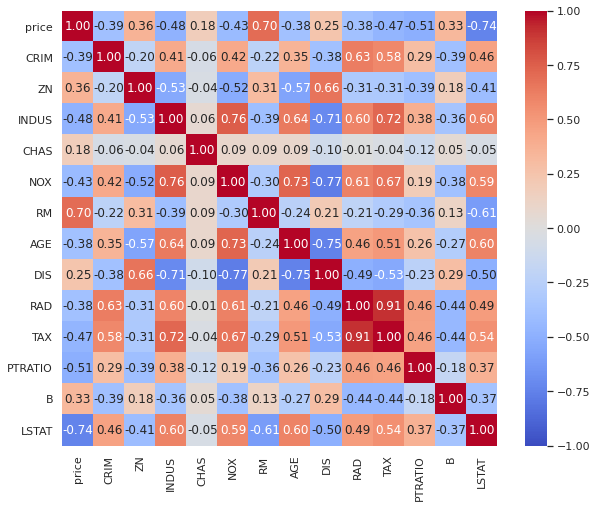

In [4]:
# 相関係数
data_corr_matrix = execute_draw_heatmap(new_df)

In [5]:
# ペアプロット
#execute_plot(new_df)

In [6]:
vslist, corrlist = get_significant_corr(new_df, data_label)
for i in range(len(vslist)):
    print(vslist[i][0] + " - " + vslist[i][1])
    print("corr = " + str(corrlist[i][0].round(4)) + ", pval = " + str(corrlist[i][1].round(4)) + '\n')

price - CHAS
corr = 0.1753, pval = 0.0001

price - DIS
corr = 0.2499, pval = 0.0

CRIM - ZN
corr = -0.2005, pval = 0.0

CRIM - RM
corr = -0.2192, pval = 0.0

ZN - B
corr = 0.1755, pval = 0.0001

CHAS - NOX
corr = 0.0912, pval = 0.0403

CHAS - RM
corr = 0.0913, pval = 0.0402

CHAS - DIS
corr = -0.0992, pval = 0.0257

CHAS - PTRATIO
corr = -0.1215, pval = 0.0062

NOX - PTRATIO
corr = 0.1889, pval = 0.0

RM - AGE
corr = -0.2403, pval = 0.0

RM - DIS
corr = 0.2052, pval = 0.0

RM - RAD
corr = -0.2098, pval = 0.0

RM - B
corr = 0.1281, pval = 0.0039

AGE - PTRATIO
corr = 0.2615, pval = 0.0

AGE - B
corr = -0.2735, pval = 0.0

DIS - PTRATIO
corr = -0.2325, pval = 0.0

PTRATIO - B
corr = -0.1774, pval = 0.0001



In [7]:
y = new_df.iloc[:, 0]                               # objective variables
first_result = execute_multiple_regression(df, y)   # multiple regression 1
first_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sat, 09 Jan 2021   Prob (F-statistic):          6.72e-135
Time:                        23:00:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""